In [97]:
from detectron2.modeling import build_model
from detectron2.config import get_cfg
import torch
import numpy as np
from detectron2.data import MetadataCatalog
cfg = get_cfg()
cfg.MODEL.MASK_ON = False
cfg.MODEL.WEIGHTS = "detectron2://LVISv0.5-InstanceSegmentation/mask_rcnn_R_50_FPN_1x/144219072/model_final_571f7c.pkl"
cfg.merge_from_file("../configs/LVISv0.5-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")

In [98]:
model = build_model(cfg).eval()  # returns a torch.nn.Module

In [99]:
print(type(model))

<class 'detectron2.modeling.meta_arch.rcnn.GeneralizedRCNN'>


In [102]:
import cv2
path1 = "../../data/moma/videos/higher_order_interaction/10514_0003000000.jpg"
path2 = "../../data/moma/videos/higher_order_interaction/09188_0006000000.jpg"

img1 = cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(path2), cv2.COLOR_BGR2RGB)

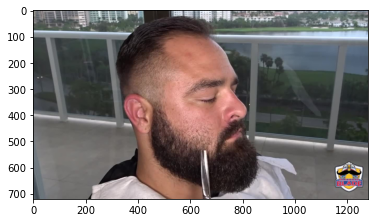

In [104]:
import matplotlib.pyplot as plt
plt.imshow(img2)

In [105]:
def img2inp(img):
    img = np.transpose(img, (2, 0, 1))
    inp = {
        "image":torch.tensor(img).cuda()
    }
    return [inp]
model.eval()
outputs = model(img2inp(img2))

In [106]:
outputs[0]['instances'].pred_classes

tensor([954], device='cuda:0')

In [109]:
from detectron2.utils.visualizer import Visualizer
v = Visualizer(
        img2[:,:,::-1], 
        )
for box, conf, class_pred in zip(outputs[0]["instances"].pred_boxes.to('cpu'), outputs[0]['instances'].scores, outputs[0]["instances"].pred_classes):
    if conf < 0.6:
        break
    v.draw_box(box.detach().numpy())
    
v = v.get_output()
img = v.get_image()[:, :, ::-1]

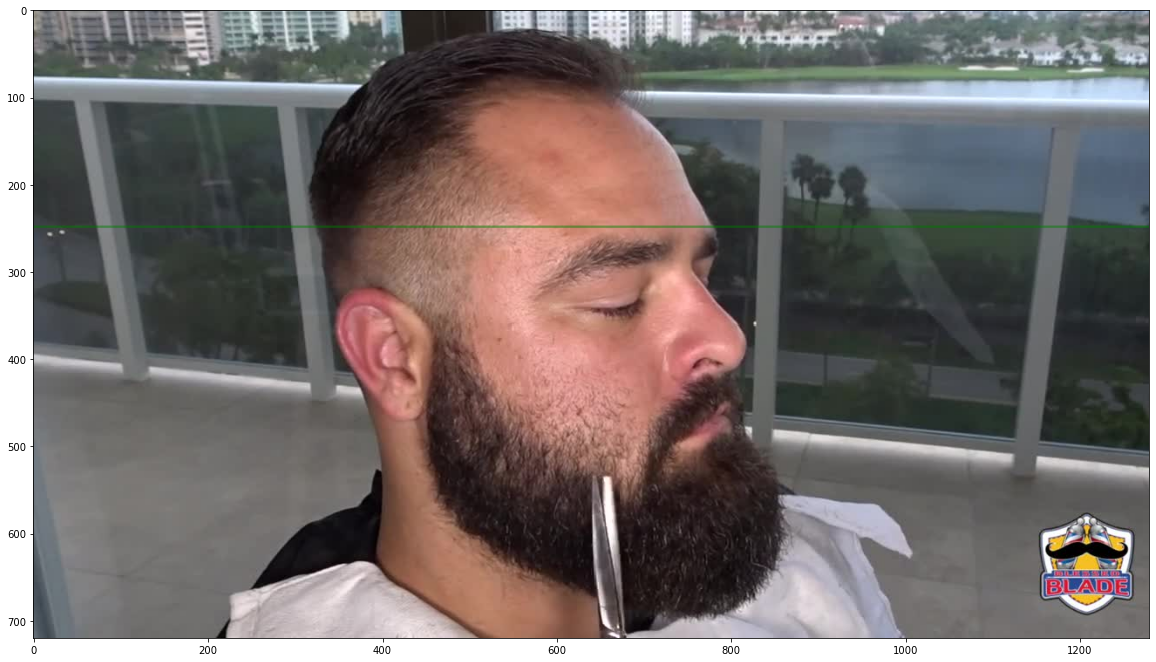

In [110]:
plt.figure(figsize = (20,20))
plt.imshow(img)

In [ ]:
# Replace the head classification layer
